In [ ]:
!pip install NSFopen

In [ ]:
from NSFopen.read import read as afmreader

import os
from os import listdir
from os.path import isfile, join

import numpy as np
import math
import pprint
import collections
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

In [ ]:
filename = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/Silicon line.nid'
alldata = afmreader(filename, verbose=False).data
params = afmreader(filename, verbose=False).param

In [ ]:
alldata

In [ ]:
params

In [ ]:
adhesion_data = alldata['Spec']['Forward']['Deflection']
zaxis = alldata['Spec']['Forward']['Z-Axis']


In [ ]:
xspan = np.linspace(0, 1.44683*10**(-6), 1024 )

In [ ]:
font = {'size': 20}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

# Calculating the uncertainities
unc = []
for n in range(len(adhesion_data[0])):
    std_deviations = np.std([arr[n] for arr in adhesion_data])
    unc.append(std_deviations * 1e6)


average_zaxis = np.mean(zaxis, axis=0) * 1e6
average_adhesion = np.mean(adhesion_data, axis=0) * 1e6


plt.errorbar(xspan*1e6, average_adhesion, yerr=unc, ecolor='r',
             errorevery=(0, 30), fmt='none', capsize=3)
plt.plot(xspan*1e6, average_adhesion, label='Experimental Values', linewidth=3)

trigger = 630

a, b = np.polyfit(xspan[trigger:]*1e6, average_adhesion[trigger:], 1)
plt.plot(xspan[trigger:]*1e6, a*xspan[trigger:]*1e6+b,
         linestyle='dashed', label=f'$y={round(a,3)}x{round(b,3)}$', linewidth=3)


plt.xlabel('Z Deflection ($ \mu$m)')
plt.ylabel('Force ($ \mu$N)')
plt.legend()

fig.savefig('Silicon_Force_Distance_Curve.png', dpi=300)

plt.show()


Absolute Error: ±7.391430012159687


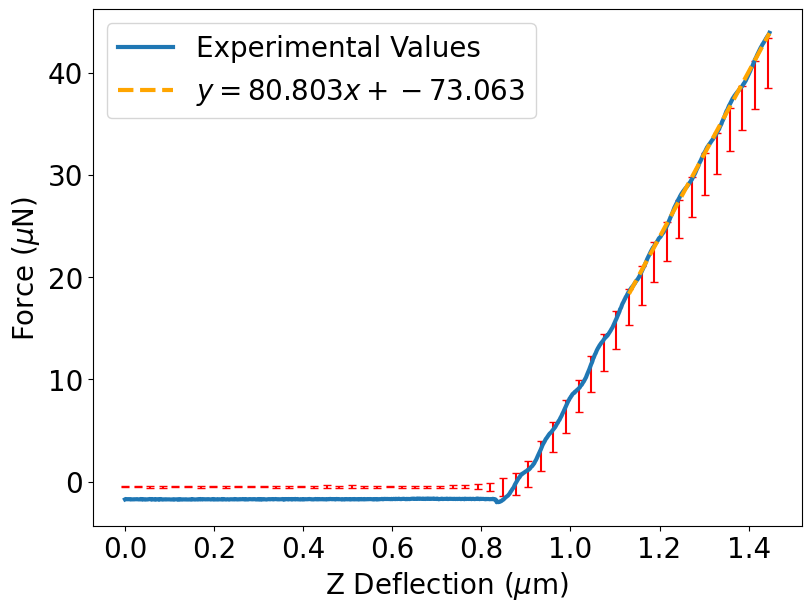

In [73]:
font = {'size': 20}
matplotlib.rc('font', **font)

filename = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico azul line.nid'
alldata = afmreader(filename, verbose=False).data
adhesion_data = alldata['Spec']['Forward']['Deflection']


fig = plt.figure(figsize=(8,6), constrained_layout=True)

# Calculating the uncertainities
unc = []
for n in range(len(adhesion_data[0])):
    std_deviations = np.std([arr[n] for arr in adhesion_data])
    unc.append(std_deviations*1e6)

trial = 4

plt.errorbar(xspan*1e6, average_adhesion[:len(xspan)]*1e6, yerr=unc, ecolor='r',
             errorevery=(0, 20), fmt='none', capsize=3)


plt.plot(xspan*1e6, adhesion_data[trial]*1e6, label='Experimental Values', linewidth=3)

trigger = 800

abs_error = np.std(adhesion_data[trial][trigger:]*1e6)
print(f'Absolute Error: ±{abs_error}')

a, b = np.polyfit(xspan[trigger:]*1e6, adhesion_data[trial][trigger:]*1e6, 1)
plt.plot(xspan[trigger:]*1e6, a*xspan[trigger:]*1e6+b,
         linestyle='dashed', label=f'$y={round(a,3)}x+{round(b,3)}$', linewidth=3,
         c='orange')


plt.xlabel('Z Deflection ($ \mu$m)')
plt.ylabel('Force ($ \mu$N)')
plt.legend()

fig.savefig('Silicon_Force_Distance_Curve.png', dpi=300)

plt.show()


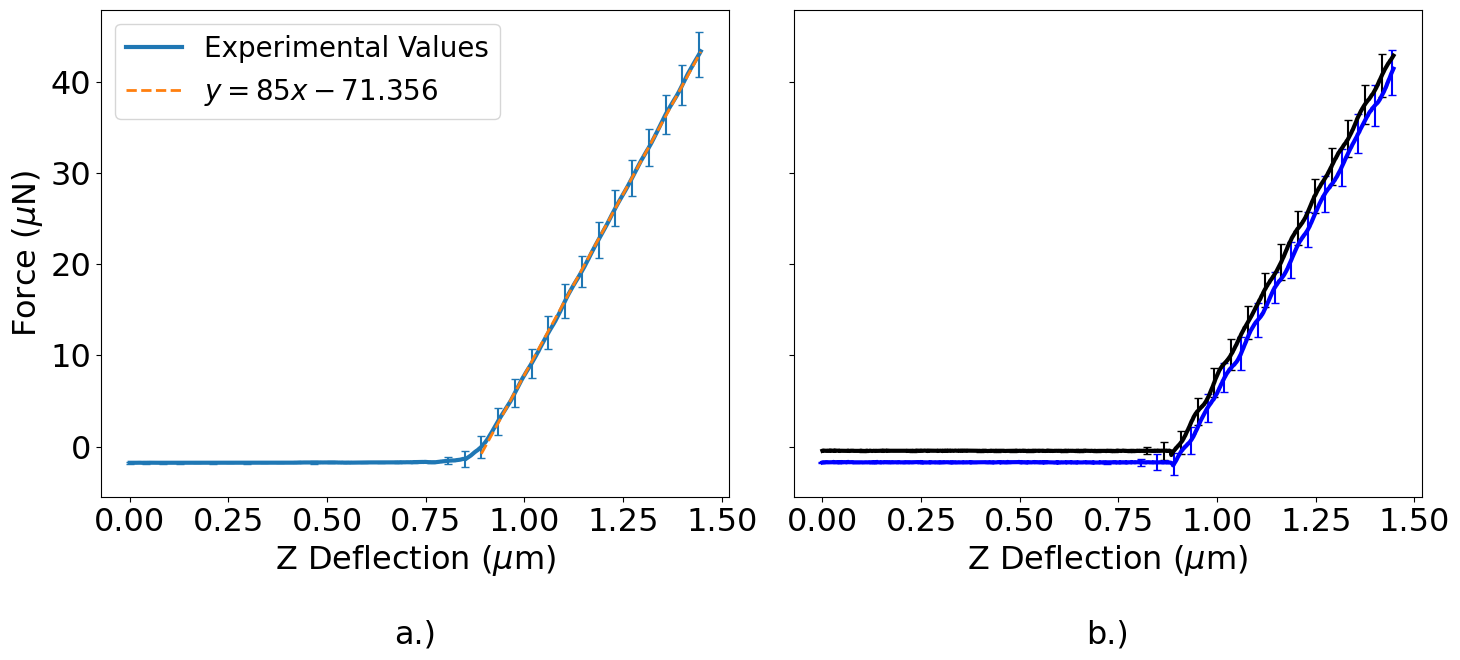

In [74]:
font = {'size': 23}
matplotlib.rc('font', **font)

filename = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/Silicon line.nid'
alldata = afmreader(filename, verbose=False).data
params = afmreader(filename, verbose=False).param

fig, ax = plt.subplots(1,2, figsize=(15,7),
                       sharey=True,
                       tight_layout=True)

# Calculating the uncertainities
unc = []
for n in range(len(adhesion_data[0])):
    std_deviations = np.std([arr[n] for arr in adhesion_data])
    unc.append(std_deviations * 1e6)


average_zaxis = np.mean(zaxis, axis=0) * 1e6
average_adhesion = np.mean(adhesion_data, axis=0) * 1e6


ax[0].errorbar(xspan*1e6, average_adhesion, yerr=unc,
             errorevery=(0, 30), fmt='none', capsize=3)
ax[0].plot(xspan*1e6, average_adhesion, label='Experimental Values', linewidth=3)

trigger = 630

a, b = np.polyfit(xspan[trigger:]*1e6, average_adhesion[trigger:], 1)
ax[0].plot(xspan[trigger:]*1e6, a*xspan[trigger:]*1e6+b,
         linestyle='dashed', label=f'$y=85x{round(b,3)}$', linewidth=2)

filename = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico azul line.nid'
alldata = afmreader(filename, verbose=False).data
adhesion_data = alldata['Spec']['Forward']['Deflection']

filename_2 = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico negro line.nid'
alldata_2 = afmreader(filename_2, verbose=False).data
adhesion_data_2 = alldata_2['Spec']['Forward']['Deflection']

font = {'size': 20}
matplotlib.rc('font', **font)

xspan = np.linspace(0, 1.44683*10**(-6), 1024 )

trial = 1

ax[1].errorbar(xspan*1e6, adhesion_data[3]*1e6, yerr=unc, ecolor='blue',
             errorevery=(0, 30), fmt='none', capsize=3)
ax[1].errorbar(xspan*1e6, adhesion_data_2[4]*1e6, yerr=unc, ecolor='black',
             errorevery=(12, 30), fmt='none', capsize=3)

ax[1].plot(xspan*1e6, adhesion_data[3]*1e6, label='Blue Plastic', linewidth=3, c='blue')
ax[1].plot(xspan*1e6, adhesion_data_2[4]*1e6, label='Black Plastic', linewidth=3, c='black')


ax[0].set_xlabel('Z Deflection ($ \mu$m)\n\na.)')
ax[1].set_xlabel('Z Deflection ($ \mu$m)\n\nb.)')
ax[0].set_ylabel('Force ($ \mu$N)')

ax[0].legend()

fig.savefig('Force graphs.png', dpi=300)

plt.show()


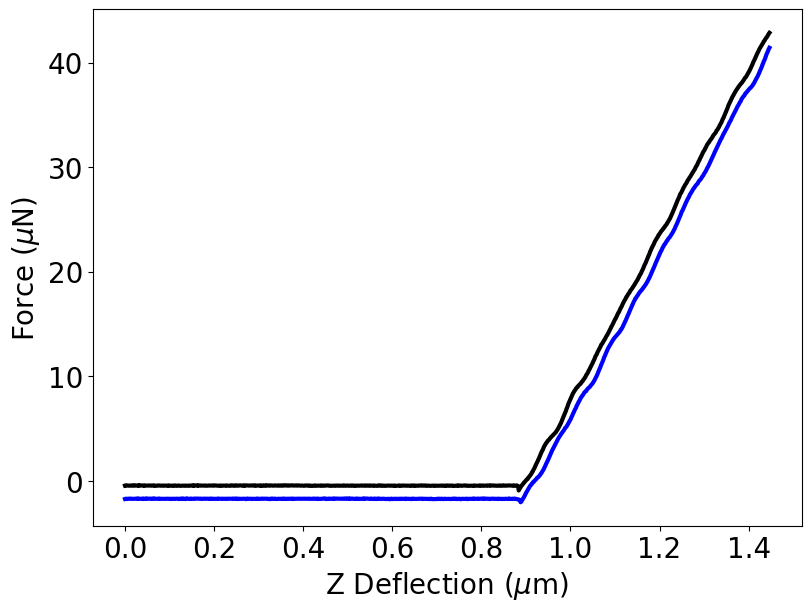

In [75]:
filename = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico azul line.nid'
alldata = afmreader(filename, verbose=False).data
adhesion_data = alldata['Spec']['Forward']['Deflection']

filename_2 = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico negro line.nid'
alldata_2 = afmreader(filename_2, verbose=False).data
adhesion_data_2 = alldata_2['Spec']['Forward']['Deflection']

font = {'size': 20}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,6), constrained_layout=True)


xspan = np.linspace(0, 1.44683*10**(-6), 1024 )

trial = 1

plt.plot(xspan*1e6, adhesion_data[3]*1e6, label='Blue Plastic', linewidth=3, c='blue')
plt.plot(xspan*1e6, adhesion_data_2[4]*1e6, label='Black Plastic', linewidth=3, c='black')

# plt.ylim(0,50)
plt.xlabel('Z Deflection ($ \mu$m)')
plt.ylabel('Force ($ \mu$N)')
# plt.legend()

fig.savefig('Plastic_Force_Distance_Curve.png', dpi=300)

plt.show()


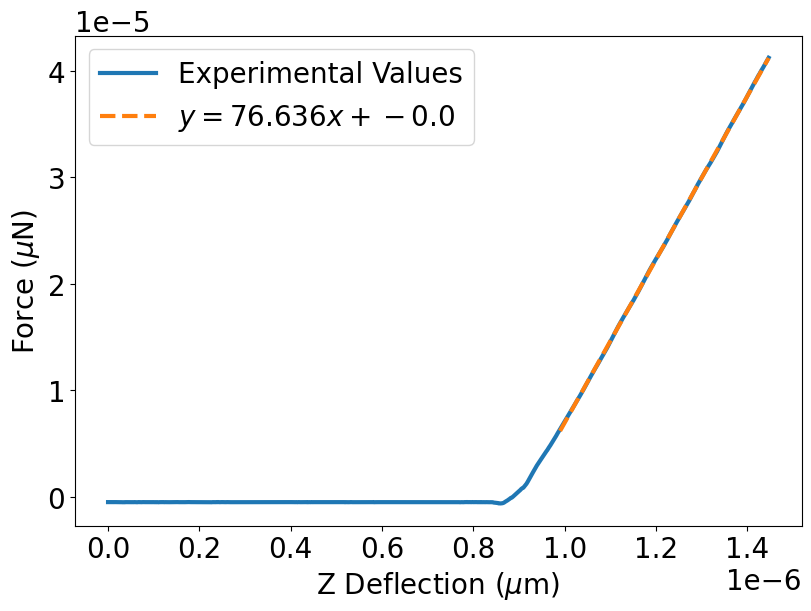

In [76]:
filename = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico negro line.nid'
alldata = afmreader(filename, verbose=False).data
adhesion_data = alldata['Spec']['Forward']['Deflection']
zaxis = alldata['Spec']['Forward']['Z-Axis']

font = {'size': 20}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

# Calculating the uncertainities
unc = []
for n in range(len(adhesion_data[0])):
    std_deviations = np.std([arr[n] for arr in adhesion_data])
    unc.append(std_deviations * 1e6)


average_zaxis = np.mean(zaxis, axis=0) * 1e6
average_adhesion = np.mean(adhesion_data, axis=0)


# plt.errorbar(xspan, average_adhesion, yerr=unc, ecolor='r',
#              errorevery=(0, 30), fmt='none', capsize=3)
plt.plot(xspan, average_adhesion, label='Experimental Values', linewidth=3)

trigger = 700

a, b = np.polyfit(xspan[trigger:], average_adhesion[trigger:], 1)
plt.plot(xspan[trigger:], a*xspan[trigger:]+b,
         linestyle='dashed', label=f'$y={round(a,3)}x+{round(b,3)}$', linewidth=3)


plt.xlabel('Z Deflection ($ \mu$m)')
plt.ylabel('Force ($ \mu$N)')
plt.legend()

# fig.savefig('Silicon_Force_Distance_Curve.png', dpi=300)

plt.show()


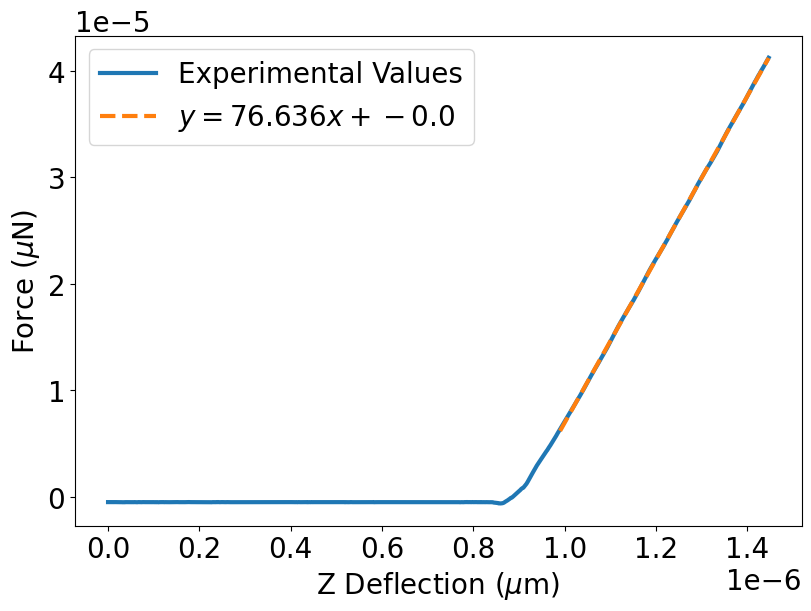

In [77]:
filename = '/content/gdrive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/plastico negro line.nid'
alldata = afmreader(filename, verbose=False).data
adhesion_data = alldata['Spec']['Forward']['Deflection']
zaxis = alldata['Spec']['Forward']['Z-Axis']

font = {'size': 20}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(8,6), constrained_layout=True)

# Calculating the uncertainities
unc = []
for n in range(len(adhesion_data[0])):
    std_deviations = np.std([arr[n] for arr in adhesion_data])
    unc.append(std_deviations * 1e6)


average_zaxis = np.mean(zaxis, axis=0) * 1e6
average_adhesion = np.mean(adhesion_data, axis=0)


# plt.errorbar(xspan, average_adhesion, yerr=unc, ecolor='r',
#              errorevery=(0, 30), fmt='none', capsize=3)
plt.plot(xspan, average_adhesion, label='Experimental Values', linewidth=3)

trigger = 700

a, b = np.polyfit(xspan[trigger:], average_adhesion[trigger:], 1)
plt.plot(xspan[trigger:], a*xspan[trigger:]+b,
         linestyle='dashed', label=f'$y={round(a,3)}x+{round(b,3)}$', linewidth=3)


plt.xlabel('Z Deflection ($ \mu$m)')
plt.ylabel('Force ($ \mu$N)')
plt.legend()

fig.savefig('Silicon_Force_Distance_Curve.png', dpi=300)

plt.show()
